In [861]:
import pandas as pd
import numpy as np

In [830]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [831]:
data = pd.read_csv("/content/drive/MyDrive/data/part-195.csv")
data.head()

,host,process,timestamp,isAnomaly,"Prepared statement cache hit rate : ((MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheHitCount / MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheMissCount))","Memory space usage : ((MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.committed / MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.max))","Active connections : (MXBean(com.bea:Name=source04,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)","Available db connection activity : (d/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).NumAvailable))","Active connections : (MXBean(com.bea:Name=source03,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)","DB connection started : (incld/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).ConnectionsTotalCount))",...,"Available db connection activity : (d/dx (MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).NumAvailable))","Available db connection activity : (d/dx (MXBean(com.bea:Name=source10,Type=JDBCConnectionPoolRuntime).NumAvailable))","Rel. unavailable connections : ((MXBean(com.bea:Name=source04,Type=JDBCDataSourceRuntime).NumUnavailable / MXBean(com.bea:Name=source04,Type=JDBCDataSourceRuntime).CurrCapacity))","Failed wait for connection : (incld/dx (MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).WaitingForConnectionFailureTotal))","Rel. unavailable connections : ((MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).NumUnavailable / MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).CurrCapacity))","Stuck threads : (MXBean(com.bea:ApplicationRuntime=source05,Name=default,Type=WorkManagerRuntime).StuckThreadCount)",Process CPU : (\Process(java)\CPU),"Successful wait for connection : (incld/dx (MXBean(com.bea:Name=source03,Type=JDBCDataSourceRuntime).WaitingForConnectionSuccessTotal))","Failed wait for connection : (incld/dx (MXBean(com.bea:Name=source03,Type=JDBCDataSourceRuntime).WaitingForConnectionFailureTotal))","Connection delay : (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).ConnectionDelayTime)"
0,lphost18,wls2,2015-02-19 13:33,False,1.0,0.88151,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,86.0
1,lphost18,wls2,2015-02-19 13:34,False,1.0,0.88151,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,86.0
2,lphost18,wls2,2015-02-19 13:35,False,1.0,0.88151,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,86.0
3,lphost18,wls2,2015-02-19 13:36,False,1.0,0.88151,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,0.0,86.0
4,lphost18,wls2,2015-02-19 13:37,False,1.0,0.88151,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,98.0,0.0,0.0,86.0


In [832]:
data.shape

(35650, 235)

In [833]:
df = pd.DataFrame(data[[
                        'System CPU : (MXBean(java.lang:type=OperatingSystem).SystemCpuLoad)',
                        'Process CPU : (MXBean(java.lang:type=OperatingSystem).ProcessCpuLoad)',
                        'Thread CPU time : (MXBean(java.lang:type=Threading).CurrentThreadCpuTime)',
                        'Memory space usage : ((MXBean(java.lang:name=PS Survivor Space,type=MemoryPool).Usage.used / MXBean(java.lang:name=PS Survivor Space,type=MemoryPool).Usage.max))',
                        'isAnomaly','Rel. heap committed : ((MXBean(java.lang:type=Memory).HeapMemoryUsage.committed / MXBean(java.lang:type=Memory).HeapMemoryUsage.max))',
                        'Rel. nonHeap usage : ((MXBean(java.lang:type=Memory).NonHeapMemoryUsage.used / MXBean(java.lang:type=Memory).NonHeapMemoryUsage.max))'
                        ]])

In [834]:
df['System CPU : (MXBean(java.lang:type=OperatingSystem).SystemCpuLoad)'].min()

0.002

In [835]:
# Rename the data from the df dataframe

df.columns = ['System CPU', 'Process CPU', 'Thread CPU time','Memory space usage','Anomaly','HeapMemoryUsage','NonHeapMemoryUsage']

In [836]:
df.head()

,System CPU,Process CPU,Thread CPU time,Memory space usage,Anomaly,HeapMemoryUsage,NonHeapMemoryUsage
0,0.053,0.001,2.438014e+12,0.979757,False,0.188776,0.783041
1,0.015,0.004,3.937485e+12,0.979757,False,0.188776,0.783049
2,0.067,0.009,2.439012e+12,0.371446,False,0.190561,0.783049
3,0.119,0.017,2.439881e+12,0.253545,False,0.188822,0.783080
4,0.180,0.085,2.440703e+12,0.017149,False,0.202966,0.783111


In [837]:
df['Thread CPU time']

0        2.438014e+12
1        3.937485e+12
2        2.439012e+12
3        2.439881e+12
4        2.440703e+12
             ...     
35645    2.858997e+12
35646    3.278447e+12
35647    3.945618e+12
35648    9.705276e+12
35649    3.946756e+12
Name: Thread CPU time, Length: 35650, dtype: float64

In [838]:
#df['Thread CPU time'] = df['Thread CPU time'].astype(float)  # or int if you want integers
df['Thread CPU time'] = df['Thread CPU time'].apply(lambda x: '{:.0f}'.format(x))


In [839]:
df.head()

,System CPU,Process CPU,Thread CPU time,Memory space usage,Anomaly,HeapMemoryUsage,NonHeapMemoryUsage
0,0.053,0.001,2438013879441,0.979757,False,0.188776,0.783041
1,0.015,0.004,3937484713627,0.979757,False,0.188776,0.783049
2,0.067,0.009,2439012287490,0.371446,False,0.190561,0.783049
3,0.119,0.017,2439880975302,0.253545,False,0.188822,0.783080
4,0.180,0.085,2440702590078,0.017149,False,0.202966,0.783111


In [840]:
from sklearn.preprocessing import LabelEncoder

In [841]:
encoder = LabelEncoder()
#df['predicting_variable_encoded'] = encoder.fit_transform(df['predicting_variable'])

In [842]:
df['Anomaly'] = encoder.fit_transform(df['Anomaly'])

In [843]:
df.head()

,System CPU,Process CPU,Thread CPU time,Memory space usage,Anomaly,HeapMemoryUsage,NonHeapMemoryUsage
0,0.053,0.001,2438013879441,0.979757,0,0.188776,0.783041
1,0.015,0.004,3937484713627,0.979757,0,0.188776,0.783049
2,0.067,0.009,2439012287490,0.371446,0,0.190561,0.783049
3,0.119,0.017,2439880975302,0.253545,0,0.188822,0.783080
4,0.180,0.085,2440702590078,0.017149,0,0.202966,0.783111


In [844]:
df['Thread CPU time']

0        2438013879441
1        3937484713627
2        2439012287490
3        2439880975302
4        2440702590078
             ...      
35645    2858997211060
35646    3278446603394
35647    3945618249280
35648    9705275540524
35649    3946755839810
Name: Thread CPU time, Length: 35650, dtype: object

In [845]:
df['Process CPU'].max()

0.569

In [846]:
x = df.drop(columns=['Anomaly']).values

In [847]:
y = df['Anomaly'].values

In [848]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [849]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [850]:
x_train = scaler.fit_transform(x_train)

In [851]:
x_test = scaler.fit_transform(x_test)

In [852]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [853]:
# define model
model = Sequential()
model.add(Dense(16,input_dim=6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='relu'))
model.add(Dense(3,activation='leaky_relu'))
model.add(Dense(2,activation='leaky_relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary() #print the model summary

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 16)                112       
                                                                 
 dense_121 (Dense)           (None, 6)                 102       
                                                                 
 dropout_20 (Dropout)        (None, 6)                 0         
                                                                 
 dense_122 (Dense)           (None, 4)                 28        
                                                                 
 dense_123 (Dense)           (None, 3)                 15        
                                                                 
 dense_124 (Dense)           (None, 2)                 8         
                                                                 
 dense_125 (Dense)           (None, 1)               

In [854]:
# compile model
model.compile(loss = "binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [855]:
# Fit the model
# history = model.fit(x_train,y_train,epochs=10,batch_size=32)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
892/892 [==============================] - 5s 4ms/step - loss: 0.5854 - accuracy: 0.7219 - val_loss: 0.4641 - val_accuracy: 0.8243
Epoch 2/50
892/892 [==============================] - 3s 3ms/step - loss: 0.4877 - accuracy: 0.7871 - val_loss: 0.3795 - val_accuracy: 0.8477
Epoch 3/50
892/892 [==============================] - 2s 3ms/step - loss: 0.4174 - accuracy: 0.8273 - val_loss: 0.2947 - val_accuracy: 0.9013
Epoch 4/50
892/892 [==============================] - 3s 3ms/step - loss: 0.3632 - accuracy: 0.8532 - val_loss: 0.2512 - val_accuracy: 0.9079
Epoch 5/50
892/892 [==============================] - 3s 4ms/step - loss: 0.3264 - accuracy: 0.8728 - val_loss: 0.1848 - val_accuracy: 0.9337
Epoch 6/50
892/892 [==============================] - 4s 4ms/step - loss: 0.3067 - accuracy: 0.8821 - val_loss: 0.3639 - val_accuracy: 0.8154
Epoch 7/50
892/892 [==============================] - 2s 3ms/step - loss: 0.2956 - accuracy: 0.8859 - val_loss: 0.3046 - val_accuracy: 0.8555
Epoch 

In [856]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [857]:
from sklearn.metrics import f1_score,accuracy_score,auc,confusion_matrix

In [858]:
# accuracy on the training dataset
training_accuracy = model.predict(x_train)
training_accuracy =[1 if y>=0.5 else 0 for y in training_accuracy]
accuracy_score(y_train,training_accuracy)

892/892 [==============================] - 2s 2ms/step


0.9032608695652173

In [859]:
# Accuracy of the test dataset
y_prediction = model.predict(x_test)
y_prediction = [1 if y>=0.5 else 0 for y in y_prediction]

accuracy_score(y_test,y_prediction)

223/223 [==============================] - 1s 2ms/step


0.902945301542777

In [860]:
confusion_matrix(y_test,y_prediction)

array([[4281,    7],
       [ 685, 2157]])

In [862]:
f1_score(y_test,y_prediction)

0.8617658809428687

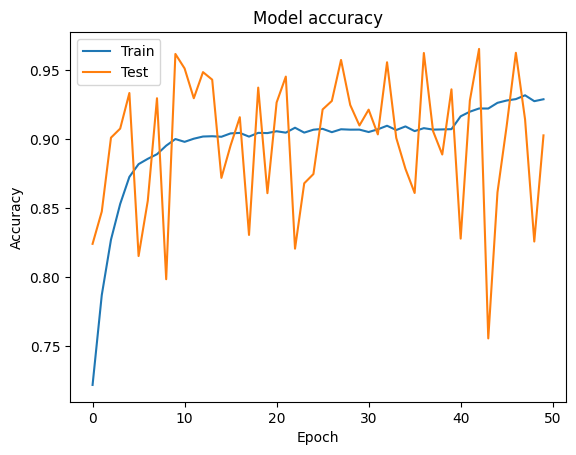

In [863]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



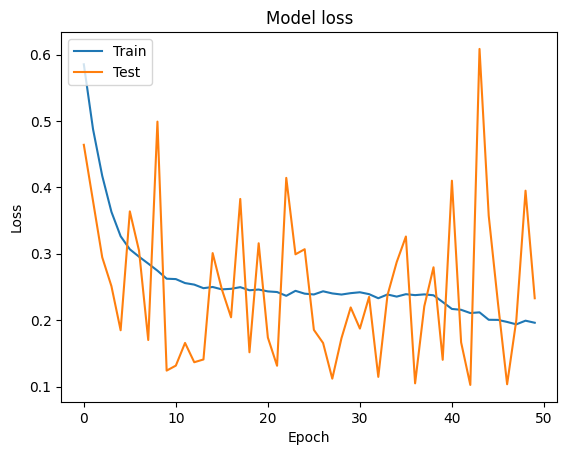

In [864]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [871]:
model.save('function1_model2_V2.h5')  # Save the model as an HDF5 file

In [866]:
# Save the model to a TensorFlow SavedModel format
# model.save('model')

In [872]:
!pip install tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 35.4 MB/s eta 0:00:00


In [873]:
# Convert the TensorFlow SavedModel to ONNX format
import tf2onnx
import onnx

In [874]:
# Convert the TensorFlow SavedModel to ONNX format
spec = (tf.TensorSpec((None, 6), tf.float32, name="input"),)
output_path = "function1_model2_V2.onnx"
model_proto, _ = tf2onnx.convert.from_keras(model, input_signature=spec, output_path=output_path)